Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 04 in Python
---------------
- ___Please put your names and student IDs here___:
    - _Name_, _Student ID_
    - _Name_, _Student ID_

---

#### Exercise 1: Pruning Decision Trees

__We will investigate the “diabetes.csv” dataset. Read the “description.txt” to understand the individual columns. Use the already imported libraries for this exercise (Note: You can install sklearn via pip as the `scikit-learn` package).__

In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree

##### __(a) Load the dataset and use a sampling method to split the dataset into a training (80% rows) and test (20% rows) dataset. The target column is the last column.__
_(Hint: use the `sklearn.model_selection.train_test_split` and set the parameter to `random_state = 0`)_

In [3]:
colnames = ["times_pregnant", "plasma_glucose", "blood_pressure", "triceps_sft", "insulin", "bmi", "dpf", "age", "class"]
df = pd.read_csv("data/diabetes.csv", header=None, names=colnames)
df.head()

,times_pregnant,plasma_glucose,blood_pressure,triceps_sft,insulin,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

##### __(b) Use the training dataset to train a decision tree. Plot the tree.__ 

In [5]:
features = ["times_pregnant", "plasma_glucose", "blood_pressure", "triceps_sft", "insulin", "bmi", "dpf", "age"]
target = "class"

dt = tree.DecisionTreeClassifier()
dt.fit(train[features], train[target])

DecisionTreeClassifier()

##### __(c)	Measure the accuracy of the decision tree on the training and test dataset. The accuracy is one metric for evaluating classification models. `Accuracy = (number of correct predictions) / (total number of predictions)`.__
_(Hint: use the `DecisionTreeClassifier.score` method)_

In [6]:
print(f"Training accuracy: {dt.score(train[features], train[target])!s}\nTest accuracy: {dt.score(test[features], test[target])!s}")

Training accuracy: 1.0
Test accuracy: 0.7857142857142857


##### __(d) Use prepruning and train a new decision tree. Use the `max_depth=7` parameter for the `DecisionTreeClassifier`. Plot the pruned decision tree.__

In [7]:
dtp = tree.DecisionTreeClassifier(max_depth=7)
dtp.fit(train[features], train[target])

DecisionTreeClassifier(max_depth=7)

##### __(e) Measure the accuracy of the pruned decision tree on the training and test dataset.__ 

In [8]:
print(f"Training accuracy: {dtp.score(train[features], train[target])!s}\nTest accuracy: {dtp.score(test[features], test[target])!s}")

Training accuracy: 0.8859934853420195
Test accuracy: 0.7922077922077922


##### __(f) Explain and discuss the results from c) and e).__

```
> Your answer
```

It seems that in **c)** we overfit, allowing the tree to learn/represent too many patterns specific to the training data. By using prepruning we prevent the tree from becoming too "training-specific", learning fewer, more general patterns and thus increasing prediction accuracy for the test data (while sacrificing some accuracy for the training data).

---

#### Exercise 2: Naïve Bayes Classification

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|No|
|2|US|US|No|No|Yes|
|3|EU|US|No|Yes|No|
|4|AS|EU|No|Yes|Yes|
|5|AS|AS|Yes|Yes|Yes|
|6|AS|AS|Yes|No|No|
|7|EU|AS|Yes|No|Yes|
|8|US|EU|No|Yes|No|
|9|US|AS|Yes|Yes|Yes|
|10|AS|EU|Yes|Yes|Yes|
|11|US|EU|Yes|No|Yes|
|12|EU|EU|No|No|Yes|
|13|EU|US|Yes|Yes|Yes|
|14|AS|EU|No|No|No|

* EU = Europe; US = United States; AS = Asia

##### __(a) According to the lecture slides, a Naïve Bayes Classifier assumes class conditional independence. Explain what this means and why that might be a problem.

```
> Your answer
```

Class-conditional independence means that we assume that features are statistically independent of each other with regards to the outcome (this means that if we conditioned on the class, features would be independent, or that the presence of one feature does not affect the presence of another). 

Assuming features to be uncorrelated with regard to the outcome is a strong assumption: for example, without looking at the data it may be that for our classification task at hand, features like "time zone" and "geolocation" are correlated, or that mails with a "suspicious subject" are also more likely to have a "suspicious body", which would violate this assumption.

##### __(b) For the given data above, calculate all conditional probabilities required by a Naïve Bayes Classifier by hand.__ 

```
> Your answer
```

**Time Zone:**

* $P(\text{TimeZone} = \text{US}|\text{Spam}) = \frac{3}{9}$ 
* $P(\text{TimeZone} = \text{US}|\text{No Spam}) = \frac{2}{5}$ 
* $P(\text{TimeZone} = \text{EU}|\text{Spam}) = \frac{3}{9}$
* $P(\text{TimeZone} = \text{EU}|\text{No Spam}) = \frac{1}{5}$
* $P(\text{TimeZone} = \text{AS}|\text{Spam}) = \frac{3}{9}$
* $P(\text{TimeZone} = \text{AS}|\text{No Spam}) = \frac{2}{5}$

**GeoLocation:**

* $P(\text{GeoLocation} = \text{US}|\text{Spam}) = \frac{2}{9}$ 
* $P(\text{GeoLocation} = \text{US}|\text{No Spam}) = \frac{2}{5}$ 
* $P(\text{GeoLocation} = \text{EU}|\text{Spam}) = \frac{4}{9}$ 
* $P(\text{GeoLocation} = \text{EU}|\text{No Spam}) = \frac{2}{5}$ 
* $P(\text{GeoLocation} = \text{AS}|\text{Spam}) = \frac{3}{9}$ 
* $P(\text{GeoLocation} = \text{AS}|\text{No Spam}) = \frac{1}{5}$ 

**SuspiciousSubject:**

* $P(\text{SuspiciousSubject} = \text{Yes}|\text{Spam}) = \frac{6}{9}$ 
* $P(\text{SuspiciousSubject} = \text{Yes}|\text{No Spam}) = \frac{1}{5}$ 
* $P(\text{SuspiciousSubject} = \text{No}|\text{Spam}) = \frac{3}{9}$ 
* $P(\text{SuspiciousSubject} = \text{No}|\text{No Spam}) = \frac{4}{5}$ 

**SuspiciousBody:**

* $P(\text{SuspiciousBody} = \text{Yes}|\text{Spam}) = \frac{5}{9}$ 
* $P(\text{SuspiciousBody} = \text{Yes}|\text{No Spam}) = \frac{3}{5}$ 
* $P(\text{SuspiciousBody} = \text{No}|\text{Spam}) = \frac{4}{9}$ 
* $P(\text{SuspiciousBody} = \text{No}|\text{No Spam}) = \frac{2}{5}$ 

##### __(c)	Calculate the posterior probabilities and classify the following three E-Mails by hand, using the probabilities calculated above.__ 
    a. E-mail A = (US, US, Yes, Yes)
    b. E-mail B = (Asia, Asia, No, No)
    c. E-mail C = (EU, Asia, No, Yes)


```
> Your answer
```

**a)** 

*Spam*, since:

$$
P(\text{Spam}|\text{US, US, Yes, Yes}) \propto \frac{3}{9} \cdot \frac{2}{9} \cdot \frac{6}{9} \cdot \frac{5}{9} \cdot \frac{9}{14} = 0.018
$$

$$
P(\text{No Spam}|\text{US, US, Yes, Yes}) \propto \frac{2}{5} \cdot \frac{2}{5} \cdot \frac{1}{5} \cdot \frac{3}{5} \cdot \frac{5}{14} = 0.007
$$

**b)** 

*Spam*, since:

$$
P(\text{Spam}|\text{Asia, Asia, No, No}) \propto \frac{3}{9} \cdot \frac{3}{9} \cdot \frac{3}{9} \cdot \frac{4}{9} \cdot \frac{9}{14} = 0.011
$$

$$
P(\text{No Spam}|\text{Asia, Asia, No, No}) \propto \frac{2}{5} \cdot \frac{1}{5} \cdot \frac{4}{5} \cdot \frac{2}{5} \cdot \frac{5}{14} = 0.009
$$

**c)** 

*Spam*, since:

$$
P(\text{Spam}|\text{EU, Asia, No, Yes}) \propto \frac{3}{9} \cdot \frac{3}{9} \cdot \frac{3}{9} \cdot \frac{5}{9} \cdot \frac{9}{14} = 0.013
$$

$$
P(\text{No Spam}|\text{EU, Asia, No, Yes}) \propto \frac{1}{5} \cdot \frac{1}{5} \cdot \frac{4}{5} \cdot \frac{3}{5} \cdot \frac{5}{14} = 0.007
$$

##### __(d) What problem do you encounter when classifying Email C and which technique could you use to overcome this problem? __ 

```
> Your answer
```

Frankly, I did not encounter any problem with classifying email C...

---

#### Exercise 3: Naïve Bayes Classification 

__In this exercise we will use the Naïve Bayes classification methods on a real data set. We will classify the digits dataset (see https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)__

<Figure size 640x480 with 0 Axes>

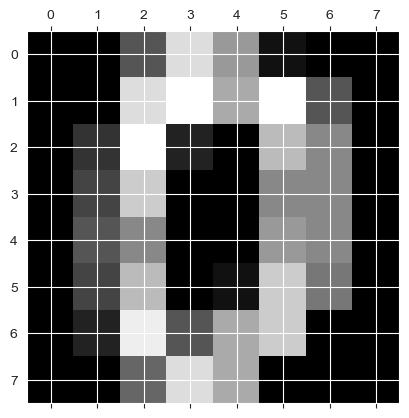

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

## example plot of one of the digits
import matplotlib.pyplot as plt 
plt.gray()
plt.matshow(digits.images[0]) 
plt.show() 

##### __(a) Split the dataset into a training (80% rows) and test (20% rows) data. The data column is `digits.data` and the target column `digits.target`.__
_(Hint: use the `sklearn.model_selection.train_test_split` and set the parameter to `random_state = 0`)_

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [11]:
train_features, test_features =  train_test_split(digits.data, test_size=0.2, random_state=0)
train_target, test_target = train_test_split(digits.target, test_size=0.2, random_state=0)

##### __(b) Generate a model and fit the dataset on the classifier.__ 
_(Hint: use already implemented version in `sklearn.naive_bayes.GaussianNB`)_

In [12]:
model = GaussianNB()
model.fit(train_features, train_target)

GaussianNB()

##### __(c) Compute the accuracy on the train and test data using the trained model.__ 
_(Hint: use already the `GaussianNB.predict` and `sklearn.metrics.accuracy_score` method for this)_

In [14]:
test_pred = model.predict(test_features)
accuracy_test = accuracy_score(y_true=test_target, y_pred=test_pred)

train_pred = model.predict(train_features)
accuracy_train = accuracy_score(y_true=train_target, y_pred=train_pred)

print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Training Accuracy: 0.8559498956158664
Test Accuracy: 0.825
